<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/Introduction_to_Torch_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This is the basic architecture of CNN




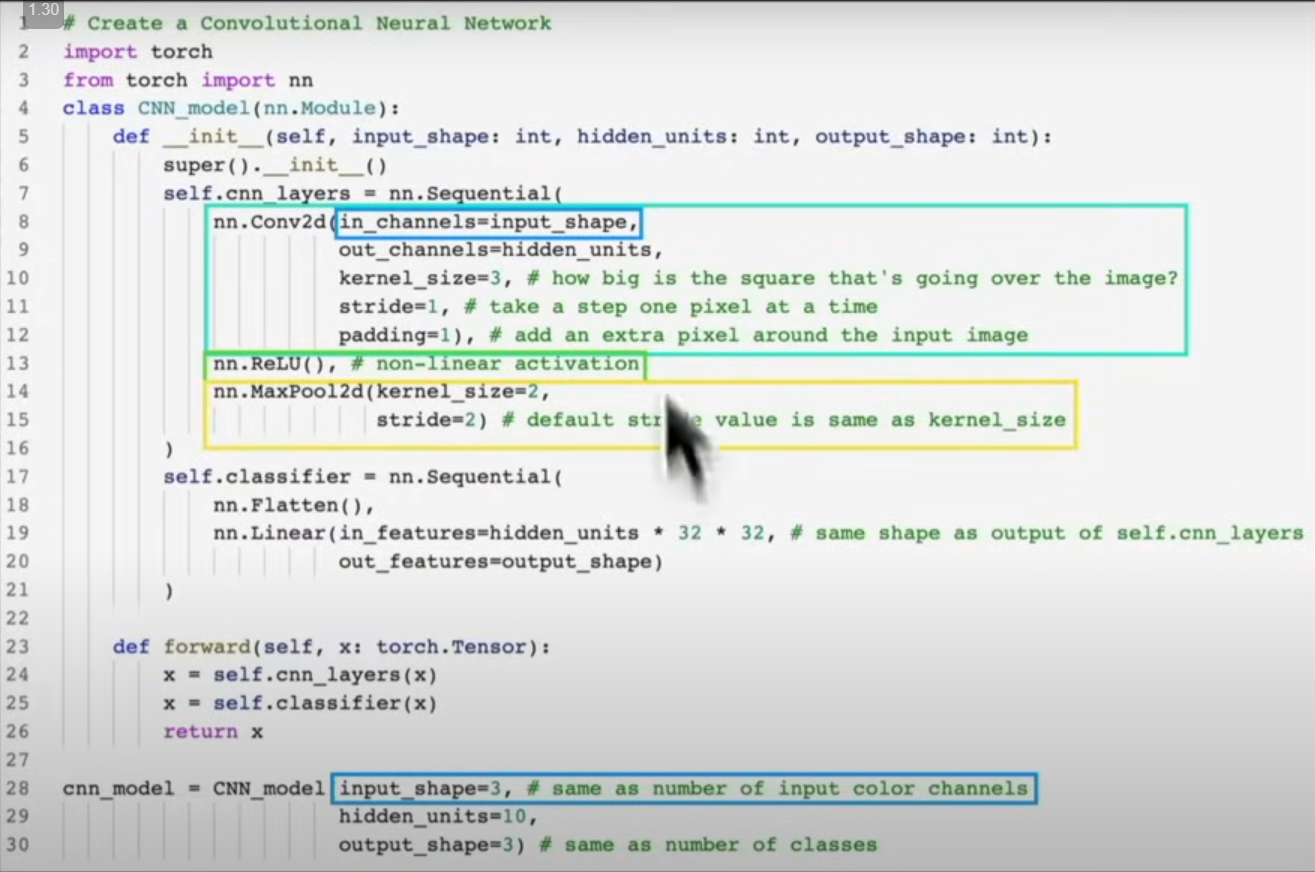

## BASIC METHODS

"torchvision" is the base domain library for Pytorch computer vision

*   `torchvision.datasets`- gets datasets and data loading functions for computer vision here
*   `torchvision.models`-get pretrained computer vision models that you can leverage for your own problems

*   `torchvision.transforms`- functions for manipulating your vision data(image) to be suitable for use with an ML model

*   `torch.utils.data.Datset`-Base dataset class for Pytorch
*   `torch.utils.data.DataLoader`-Creates a python iterable over a dataset.







In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [2]:
# Setup training data
# Here the FASHION MNIST is a type of data which contains all the fashion types
from torchvision import datasets
train_data=datasets.FashionMNIST(
    root="data", #This specifies where to download the data
    train=True, #do we want the training dataset if specified false,then it takes testing dataset
    download=True,# to download it
    transform=torchvision.transforms.ToTensor(), #Do we want to transform to tensor
    target_transform=None #
)

test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=torchvision.transforms.ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.0MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 176kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.19MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 26.0MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
image,label=train_data[0]  #This means that the data return 2 things image and label
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [4]:
#This gives us the classes that r available in the dataset
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
# This gives us the classes along with their index in the dataset
classes_idx=train_data.class_to_idx
classes_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

#Grey scale images have a color channel of 1

In [6]:
print(f"Image shape:{image.shape}->[color_channels,height,width]")
print(f"Image label:{class_names[label]}")

Image shape:torch.Size([1, 28, 28])->[color_channels,height,width]
Image label:Ankle boot


Image shape:torch.Size([1, 28, 28])


TypeError: Invalid shape (1, 28, 28) for image data

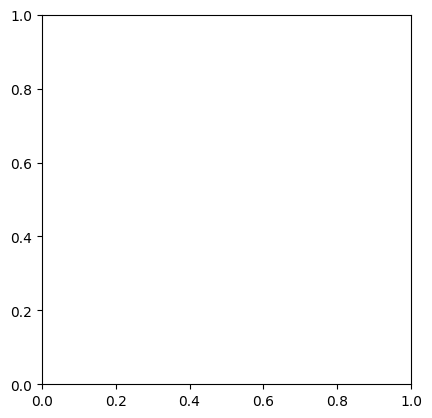

In [7]:
import matplotlib.pyplot as plt
image,label=train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image)

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

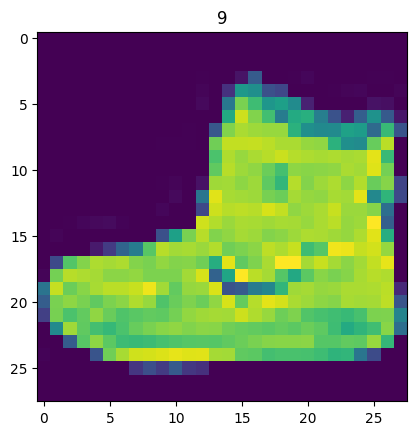

In [8]:
#The above throws an error due to extra dimensions, So we use squeeze the data to fix it
image,label=train_data[0]
print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

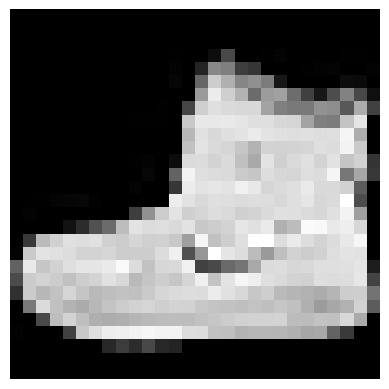

In [9]:
image,label=train_data[0]
plt.imshow(image.squeeze(),cmap="grey") #Cmap is color map,also written as 'c'
plt.axis(False)

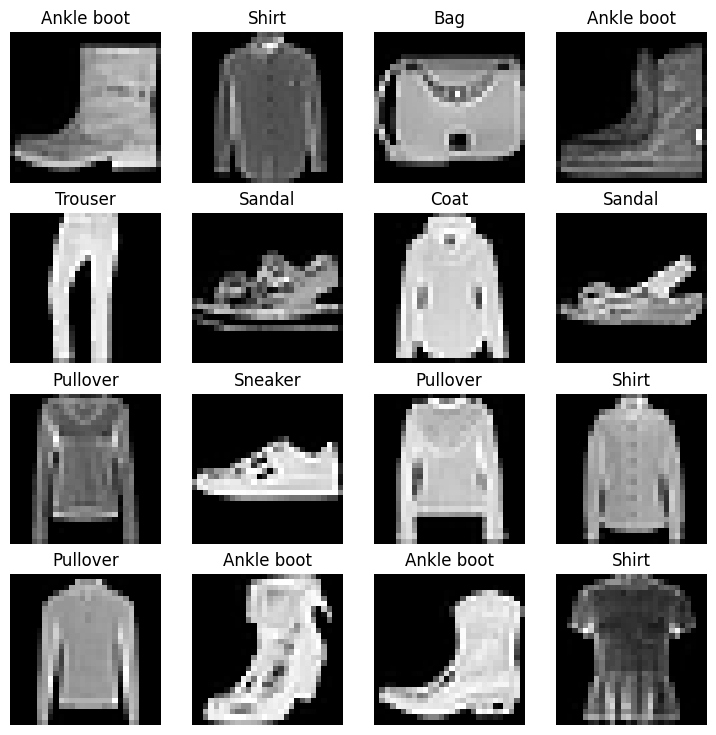

In [10]:
# Plotting mutiple images
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="grey")
  plt.title(class_names[label])
  plt.axis(False)

## DataLoaders

Right now, our data is in the form of Pytotch Datasets.

We will use DataLoaders to convert our data into iterable data

We basically turn our Big data into mini batches.We do this beacuse usually the datas are very big and we might not be able to store those datas in our storage.

Moreover it gives our NN more chances to update its gradient per epoch.

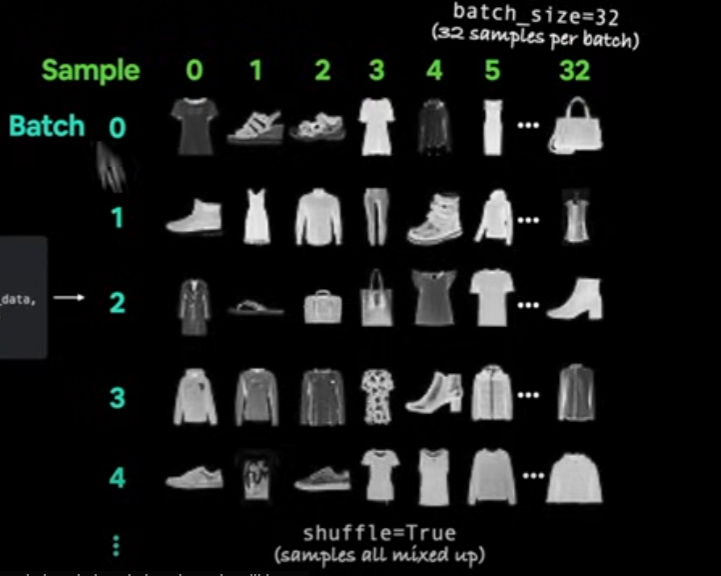

In [11]:
from torch.utils.data import DataLoader

#Setup the batch size hyperparameter
BATCH_SIZE=32

#We put the shuffle as true so that our NN doesnt get used to a similar in the data
# Eg:- if all the shoes r in one row, then NN will think think all r shoes in that row
train_dataloader=DataLoader(dataset=train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(dataset=test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

In [12]:
print(f"DataLoaders:{train_dataloader,test_dataloader}")
print(f"Length of train_dataloader:{len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader:{len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders:(<torch.utils.data.dataloader.DataLoader object at 0x7f8340a14790>, <torch.utils.data.dataloader.DataLoader object at 0x7f8340e08050>)
Length of train_dataloader:1875 batches of 32
Length of test_dataloader:313 batches of 32


[32,1,28,28] This means


*   32 is the batch_Size u specified
*   1 is the color_channels

*   28 is the height
*   28 is the width





In [13]:
train_features_batch,train_labels_batch=next(iter(train_dataloader))
print(f"Feature batch shape:{train_features_batch.size()}")
print(f"Labels batch shape:{train_labels_batch.size()}")

Feature batch shape:torch.Size([32, 1, 28, 28])
Labels batch shape:torch.Size([32])


## Model 0:Build a baseline Model
A baseline model is a simple model you will try and improve upon with subsequent model/experiments.In other words:start simply and add complexity when necessary.

We will use a "flatten" Model...`nn.Flatten` is a module in PyTorch that converts multi-dimensional tensors into a single dimension. This is commonly used to prepare the output of convolutional layers for input into fully connected layers in neural networks.

In [14]:
#Creating a flatten layer
flatten_model=nn.Flatten()

x=train_features_batch[0]

output=flatten_model(x)
print(f"Shape before flattening:{x.shape}")
print(f"Shape after flattening:{output.shape}")

Shape before flattening:torch.Size([1, 28, 28])
Shape after flattening:torch.Size([1, 784])


In [15]:
len(class_names)

10

In [16]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
              input_shape:int,
              hidden_units:int,
              output_shape:int):
    super().__init__()

    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  #The forward method should be an instance method of the class
  def forward(self,x):
    return self.layer_stack(x)

In [17]:
torch.manual_seed(42)

#The output of flatten ie we got 784...so will use that as input shape

model_0=FashionMNISTModelV0(
    input_shape=784, #28*28
    hidden_units=10,
    output_shape=len(class_names)
)
model_0.to("cpu")

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
dummy_x=torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

##LOSS FUNCTION,OPTIMIZER and evaluation metrics

we will use `nn.CrossEntropyLoss` because we are working on multi class model

Our optimizer will be `torch.optim.SGD()`

For evaluation metrics we will use accuracy function


In [19]:
import requests
from pathlib import Path
# Download helper functions from learn pytorch repo

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

In [20]:
#for accuracy function
#from helper_functions import accuracy_fn  YOu can do this too
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

#Setup loss function and optimizer
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_0.parameters(),lr=0.1)

## Creating a function to time our experiments

Machine Learning is very experimental

two of the main things youll often want to track are:

1.`Model performance`

2.`How fast it runs`

In [21]:
from timeit import default_timer as timer
def print_train_time(start:float, #The start time
                    end:float,    # The end time
                    device:torch.device=None): #This is none for now cuz we want to check speed between cuda and cpu
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [24]:
if torch.cuda.is_available():
  device="cuda"
else:
  device="cpu"
device

'cuda'

In [25]:
start_time=timer()
end_time=timer()
print_train_time(start=start_time,end=end_time,device="cpu")

Train time on cpu: 0.000 seconds


3.61539999857996e-05

##Creating Training and testing loop



1.   Loop through epochs
2.   Loop through training batches,perform training steps,calculate the train loss **per batch**

1.   Loop through testing batches,perform testing steps,calculate the test loss **per batch**








**TQDM** is to track the process ie it shows a progress bar

In [26]:
#import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu=timer()


epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n-------")
  train_loss=0
  # Add a loop to loop through the training batches
  for batch,(X,y) in enumerate(train_dataloader): # X is image,y is label
    model_0.train()

    #Forward pass
    y_pred=model_0(X)
    #Loss function
    loss=loss_fn(y_pred,y)
    train_loss+=loss # to calculate avg loss per batch

    #Optimizer zero grad
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
  #Divide total train loss by length of train dataloader
  train_loss /=len(train_dataloader)

  ##Testing loop
  test_loss,test_acc=0,0
  model_0.eval()
  with torch.inference_mode():
    for X,y in test_dataloader:
      test_pred=model_0(X)
      test_loss+=loss_fn(test_pred,y)

      test_acc+=accuracy_fn(y_true=y,y_pred=test_pred.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss:{train_loss:.5f} | Test loss:{test_loss:.5f} | Test acc:{test_acc:.2f}%")

#Calculate Training time
train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(start=train_time_start_on_cpu,
                                          end=train_time_end_on_cpu,
                                          device=str(next(model_0.parameters()).to(device)))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.59039 | Test loss:0.50954 | Test acc:82.04%
Epoch:1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.47633 | Test loss:0.47989 | Test acc:83.20%
Epoch:2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss:0.45503 | Test loss:0.47664 | Test acc:83.43%
Train time on tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.023

## Making a new way of running model

In [27]:
torch.manual_seed(42)
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn):
    loss,acc=0,0
    model.eval()
    with torch.inference_mode():
      for X,y in tqdm(data_loader):
        y_pred=model(X)

        loss+=loss_fn(y_pred,y)
        acc+=accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      loss/=len(data_loader)
      acc/=len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}
model_0_results=eval_model(model=model_0,
                           data_loader=test_dataloader,
                           loss_fn=loss_fn,
                           accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

##MODEL_1 will be a non linear model

In [45]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x):
    return self.layer_stack(x)

`next()`: The next() function is then called on this iterator, which retrieves the next item from the sequence of parameters. As previously mentioned, the next() function returns the next item from an iterator and advances its position. In this scenario, it will retrieve the first parameter of the model.

In [46]:
torch.manual_seed(42)
model_1=FashionMNISTModelV1(input_shape=784, #This is output of the flatten layer
                            hidden_units=10,
                            output_shape=len(class_names)).to(device)


next(model_1.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
        [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
        [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
        ...,
        [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
        [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
        [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]],
       device='cuda:0', requires_grad=True)

In [47]:
from helper_functions import accuracy_fn
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_1.parameters(),lr=0.1)

##Functionizing training and evaluation/testing loops

*   training loop-`train_step()`
*   testing loop-`test_step()`



In [48]:
def train_step(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device=device):
  train_loss,train_acc=0,0

  # Put model in training mode
  model.train()

  #add a lop to loop through the training batches
  for batch,(X,y) in enumerate(data_loader):
    X,y=X.to(device),y.to(device)

    #forward pass
    y_pred=model(X)

    #loss function
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=accuracy_fn(y_true=y,
                            y_pred=y_pred.argmax(dim=1))# #logits->prediction labels we do this so that y and y_pred are of same type

    #optimizer
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #step function
    optimizer.step()

    if batch%400==0:
      print(f"Looked at {batch*len(X)}/{len(data_loader.dataset)} samples")

  train_loss/=len(data_loader)
  train_acc/=len(data_loader)
  print(f"Train loss:{train_loss:.5f} | Train acc:{train_acc:.2f}%")



In [51]:
def test_step(model:torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):

  test_loss,test_acc=0,0

  model.eval()

  with torch.inference_mode():
    for X,y in data_loader:
      # Send the data to the target device
      X,y=X.to(device),y.to(device)

      # Forward Pass
      test_pred=model(X)

      # Calculate the loss/acc
      loss=loss_fn(test_pred,y)
      test_loss+=loss
      test_acc+=accuracy_fn(y_true=y,
                            y_pred=test_pred.argmax(dim=1)) #logits->prediction labels

    test_loss/=len(data_loader)
    test_acc/=len(data_loader)
    print(f"Test Loss:{test_loss:.5f} | Test acc:{test_acc:.5f}\n")

#Now we are going to run these 2 functions like how we used to train and test our model

In [52]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu=timer()


epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
train_time_end_on_gpu=timer()

total_train_time_model_1=print_train_time(start=train_time_start_on_gpu,
                                          end=train_time_end_on_gpu,
                                          device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.80838 | Train acc:70.84%
Test Loss:0.71562 | Test acc:74.49081

Epoch:1

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.67008 | Train acc:75.81%
Test Loss:0.69731 | Test acc:74.74042

Epoch:2

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss:0.64269 | Train acc:76.63%
Test Loss:0.66914 | Test acc:75.86861

Train time on cuda: 27.701 seconds


# We can see that we didnt beat our model_0 results


**NOTE**

Sometimes,depending on your data/hardware you might find that your model trains faster on CPU than GPU

This might be because of overhead for copying data/model to and from the GPU outweighs the compute benefits offered by the GPU